In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

C:\Users\rajat\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\rajat\AppData\Local\Temp\ipykernel_4920\583520075.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was too old on your system - pyarrow 10.0.1 is the current minimum supported version as of this release.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
Rest_data = pd.read_csv('C:\\Users\\rajat\\Desktop\\Machine learning\\ZomatoRestaurantsIndia.csv')

In [3]:
Rest_data.head(2)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1


In [4]:
Rest_data.shape

(211944, 26)

In [5]:
Rest_data.size

5510544

In [6]:
Rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         207117 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [7]:
Rest_data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499475,77.615276,1.0,595.812229,1.882535,3.395937,378.002571,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781261,7.500104,0.0,606.239363,0.892989,1.283642,925.333106,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514181,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841214,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [8]:
Rest_data.isnull().sum()

res_id                       0
name                         0
establishment             4827
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                2069
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [9]:
# Assuming df is your DataFrame and 'highlights' is the column containing the data
Rest_data['Type_of_payment'] = Rest_data['highlights'].fillna('').apply(lambda x: 'Cash' if 'Cash' in str(x) else 'other')

In [10]:
# Assuming df is your DataFrame and 'highlights' is the column containing the data
Rest_data['Type_of_Food'] = Rest_data['highlights'].fillna('').apply(lambda x: 'Pure Veg' if 'Pure Veg' in str(x) else 'Non-Veg')

In [11]:
Rest_data['Type_of_payment'].value_counts()

Type_of_payment
Cash     203036
other      8908
Name: count, dtype: int64

# Handling Data

In [12]:
Rest_data = Rest_data.drop(columns = ['url','opentable_support', 'zipcode'], axis = 1)

In [13]:
Rest_data.isnull().sum()

res_id                     0
name                       0
establishment           4827
address                  134
city                       0
city_id                    0
locality                   0
latitude                   0
longitude                  0
country_id                 0
locality_verbose           0
cuisines                1391
timings                 3874
average_cost_for_two       0
price_range                0
currency                   0
highlights              2069
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
delivery                   0
takeaway                   0
Type_of_payment            0
Type_of_Food               0
dtype: int64

In [14]:
Rest_data.isnull().mean()*100

res_id                  0.000000
name                    0.000000
establishment           2.277488
address                 0.063224
city                    0.000000
city_id                 0.000000
locality                0.000000
latitude                0.000000
longitude               0.000000
country_id              0.000000
locality_verbose        0.000000
cuisines                0.656305
timings                 1.827841
average_cost_for_two    0.000000
price_range             0.000000
currency                0.000000
highlights              0.976201
aggregate_rating        0.000000
rating_text             0.000000
votes                   0.000000
photo_count             0.000000
delivery                0.000000
takeaway                0.000000
Type_of_payment         0.000000
Type_of_Food            0.000000
dtype: float64

In [15]:
rest_datas = ['establishment', 'address', 'cuisines','timings', 'highlights']

for i in rest_datas:
    Rest_data[i].fillna(Rest_data[i].mode()[0], inplace=True)
    print(i, "=",Rest_data[i].mode()[0])

C:\Users\rajat\AppData\Local\Temp\ipykernel_4920\719433150.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Rest_data[i].fillna(Rest_data[i].mode()[0], inplace=True)


establishment = Quick Bites
address = Laxman Jhula, Tapovan, Rishikesh
cuisines = North Indian
timings = 11 AM to 11 PM
highlights = Dinner, Takeaway Available, Lunch, Cash, Indoor Seating


In [16]:
Rest_data.isnull().sum()

res_id                  0
name                    0
establishment           0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
delivery                0
takeaway                0
Type_of_payment         0
Type_of_Food            0
dtype: int64

In [17]:
Rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   address               211944 non-null  object 
 4   city                  211944 non-null  object 
 5   city_id               211944 non-null  int64  
 6   locality              211944 non-null  object 
 7   latitude              211944 non-null  float64
 8   longitude             211944 non-null  float64
 9   country_id            211944 non-null  int64  
 10  locality_verbose      211944 non-null  object 
 11  cuisines              211944 non-null  object 
 12  timings               211944 non-null  object 
 13  average_cost_for_two  211944 non-null  int64  
 14  price_range           211944 non-null  int64  
 15  

In [18]:
Rest_data.drop_duplicates(inplace = True)

# Exploratory Data Analysis

In [19]:
delivery_counts = Rest_data['delivery'].value_counts()

[]

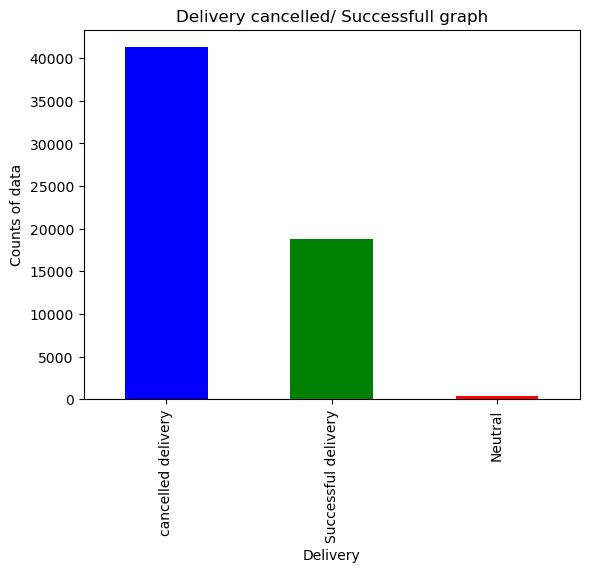

In [20]:
delivery_counts.plot(kind = 'bar', color = {"red", "green", "blue"})
plt.title("Delivery cancelled/ Successfull graph")
plt.ylabel('Counts of data')
plt.xlabel('Delivery')
plt.xticks(range(len(delivery_counts.index)), ['cancelled delivery', 'Successful delivery', 'Neutral'])
plt.plot()

[]

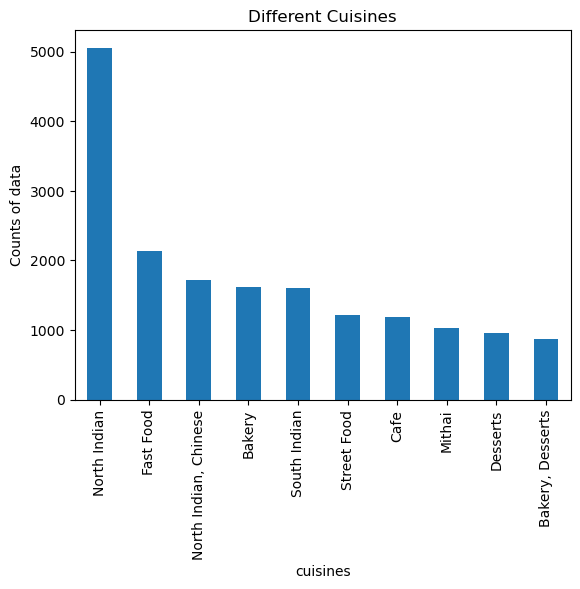

In [21]:
cuisines_counts = Rest_data['cuisines'].value_counts().nlargest(10)
cuisines_counts
cuisines_counts.plot(kind = 'bar')
plt.title("Different Cuisines")
plt.ylabel('Counts of data')
plt.plot()

In [22]:
Rest_data['rating_text'].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Dobré', 'Baik', 'Sangat Baik', 'Excelente', 'Bardzo dobrze',
       'Wybitnie', 'Ottimo', 'Muito Bom', 'Velmi dobré', 'Skvělá volba',
       'Muy Bueno', 'Bom', 'İyi', 'Çok iyi', 'Harika', 'Terbaik',
       'Skvělé', 'Průměr', 'Ortalama', 'Bueno', 'Eccellente', 'Muito bom',
       'Dobrze', 'Buono', 'Média', 'Scarso', 'Promedio', 'Veľmi dobré',
       'Vynikajúce', 'Średnio', 'Priemer', 'Biasa', 'Media'], dtype=object)

[]

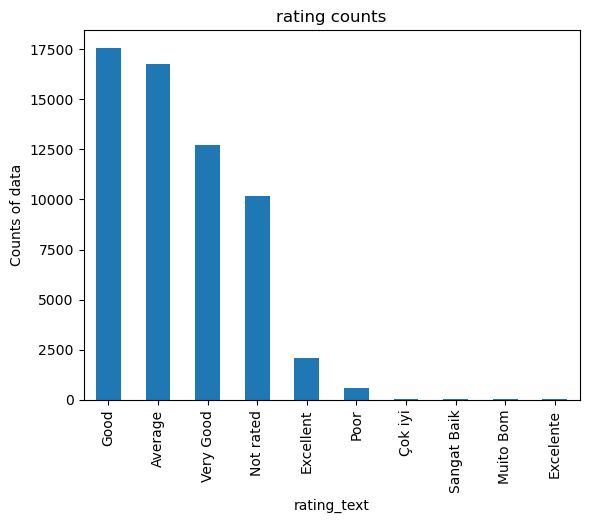

In [23]:
rating_counts = Rest_data['rating_text'].value_counts().nlargest(10)
rating_counts
rating_counts.plot(kind = 'bar')
plt.title("rating counts")
plt.ylabel('Counts of data')
plt.plot()

In [24]:
locality_counts = Rest_data['locality_verbose'].value_counts().nlargest(10)
locality_counts

locality_verbose
Gomti Nagar, Lucknow     315
Tirumala, Tirupati       257
Model Town, Jalandhar    237
Lashkar, Gwalior         233
College Road, Nashik     232
CIDCO, Aurangabad        224
Bistupur, Jamshedpur     218
Vijay Nagar, Indore      214
Bedeswar, Jamnagar       211
Sardarpura, Jodhpur      205
Name: count, dtype: int64

[]

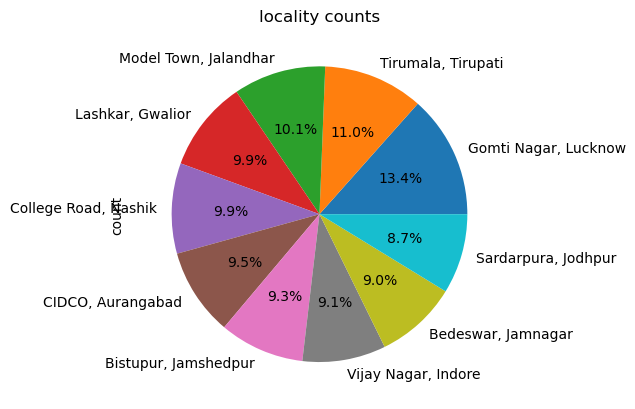

In [25]:
locality_counts.plot(kind = 'pie', autopct='%1.1f%%')
plt.title("locality counts")
plt.plot()

[]

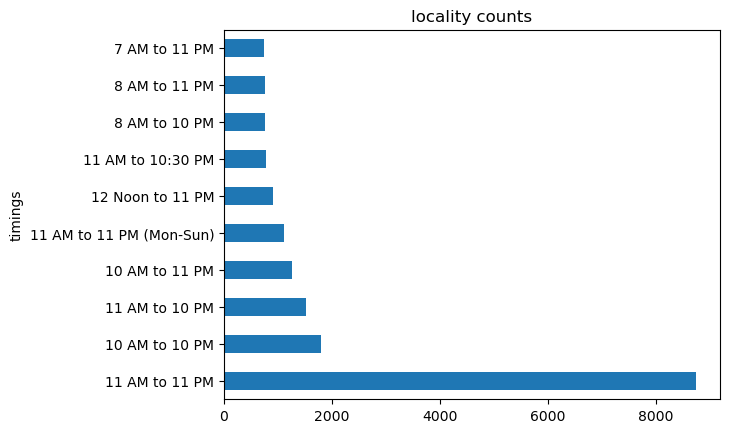

In [26]:
timing_counts = Rest_data['timings'].value_counts().nlargest(10)
timing_counts
timing_counts.plot(kind = 'barh')
plt.title("locality counts")
plt.plot()

In [27]:
count_cuisine = Rest_data['cuisines'].value_counts().nlargest(10)
count_cuisine

cuisines
North Indian             5057
Fast Food                2137
North Indian, Chinese    1720
Bakery                   1618
South Indian             1598
Street Food              1221
Cafe                     1181
Mithai                   1032
Desserts                  950
Bakery, Desserts          872
Name: count, dtype: int64

In [28]:
Rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60411 entries, 0 to 211942
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                60411 non-null  int64  
 1   name                  60411 non-null  object 
 2   establishment         60411 non-null  object 
 3   address               60411 non-null  object 
 4   city                  60411 non-null  object 
 5   city_id               60411 non-null  int64  
 6   locality              60411 non-null  object 
 7   latitude              60411 non-null  float64
 8   longitude             60411 non-null  float64
 9   country_id            60411 non-null  int64  
 10  locality_verbose      60411 non-null  object 
 11  cuisines              60411 non-null  object 
 12  timings               60411 non-null  object 
 13  average_cost_for_two  60411 non-null  int64  
 14  price_range           60411 non-null  int64  
 15  currency              6

<AxesSubplot: xlabel='price_range', ylabel='aggregate_rating'>

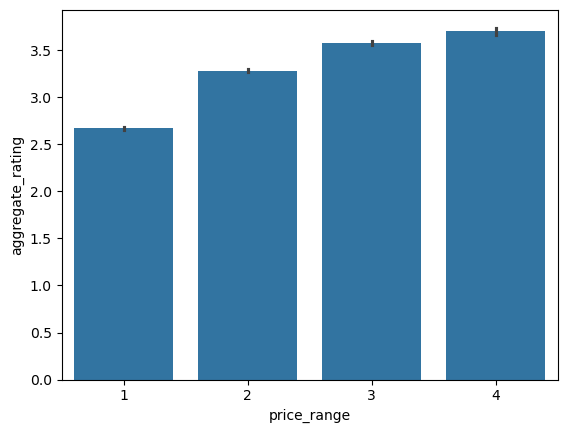

In [29]:
sns.barplot(x = Rest_data['price_range'], y = Rest_data['aggregate_rating'])

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600'),
  Text(1800.0, 0, '1800')])

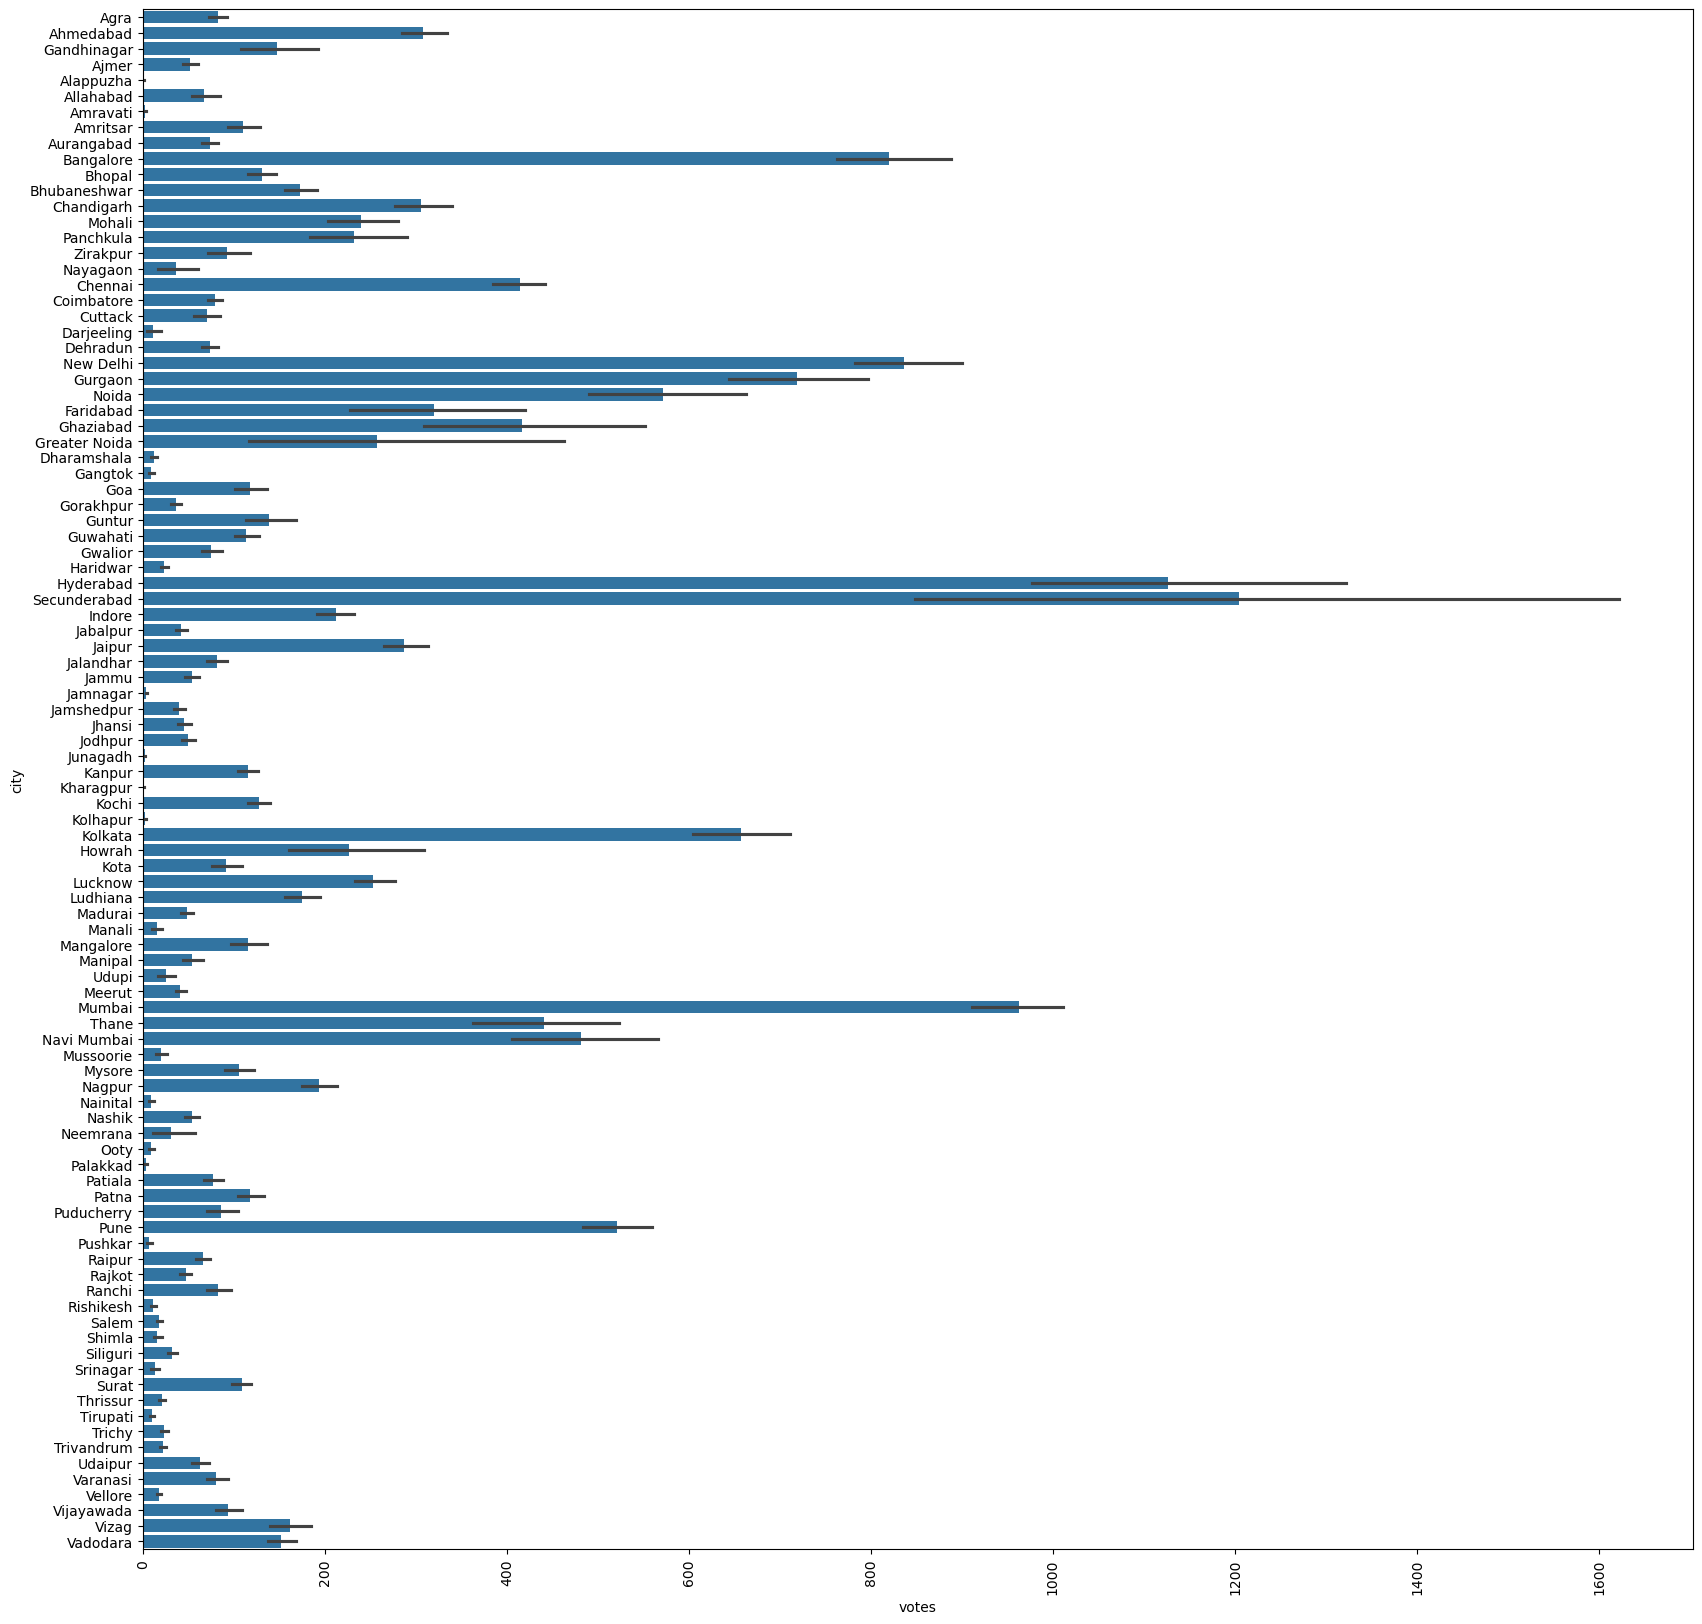

In [30]:
plt.figure(figsize = (20,20))
sns.barplot(x = Rest_data['votes'], y = Rest_data['city'])
plt.xticks(rotation=90)

In [31]:
Rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60411 entries, 0 to 211942
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                60411 non-null  int64  
 1   name                  60411 non-null  object 
 2   establishment         60411 non-null  object 
 3   address               60411 non-null  object 
 4   city                  60411 non-null  object 
 5   city_id               60411 non-null  int64  
 6   locality              60411 non-null  object 
 7   latitude              60411 non-null  float64
 8   longitude             60411 non-null  float64
 9   country_id            60411 non-null  int64  
 10  locality_verbose      60411 non-null  object 
 11  cuisines              60411 non-null  object 
 12  timings               60411 non-null  object 
 13  average_cost_for_two  60411 non-null  int64  
 14  price_range           60411 non-null  int64  
 15  currency              6

In [32]:
pyment_count = Rest_data['Type_of_payment'].value_counts()

C:\Users\rajat\AppData\Local\Temp\ipykernel_4920\3881703483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(pyment_count,palette=colors)


([0, 1], [Text(0, 0, 'Cash'), Text(1, 0, 'other')])

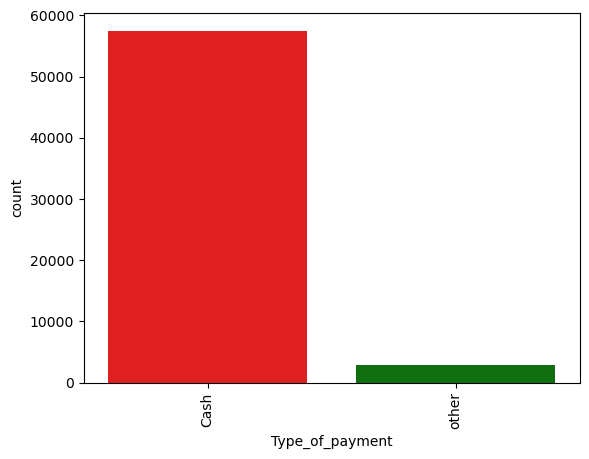

In [33]:
colors = ['red', 'green']
sns.barplot(pyment_count,palette=colors)
plt.xticks(rotation = 90)

In [34]:
food_counts = Rest_data['Type_of_Food'].value_counts()

C:\Users\rajat\AppData\Local\Temp\ipykernel_4920\144204247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(food_counts, palette=colors)


<AxesSubplot: xlabel='Type_of_Food', ylabel='count'>

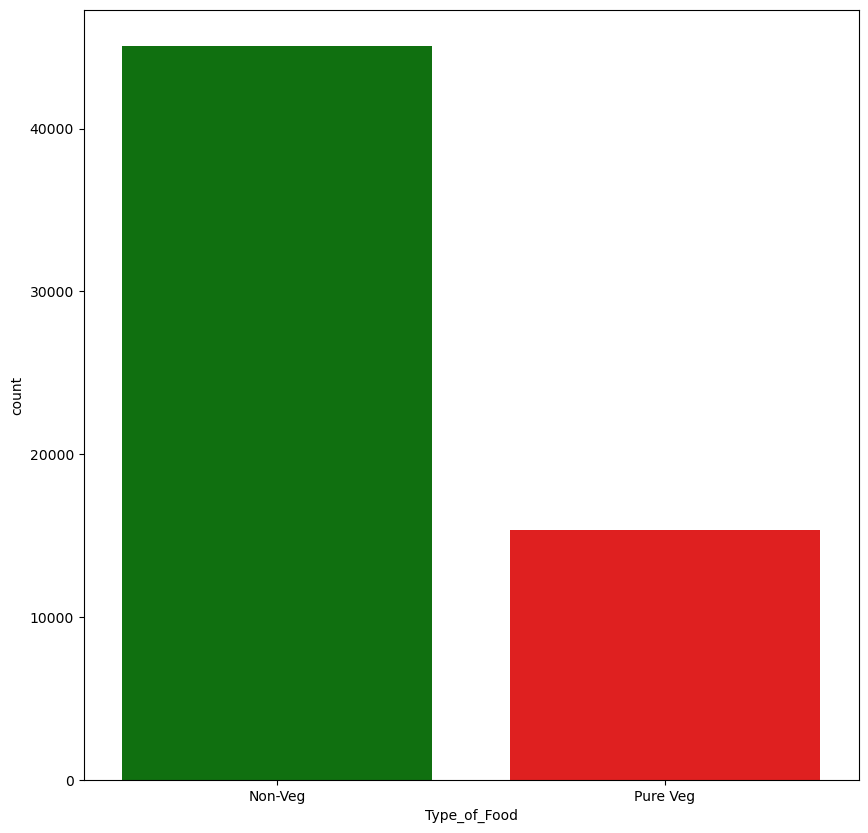

In [35]:
plt.figure(figsize = (10,10))
colors = ['green', 'red']
sns.barplot(food_counts, palette=colors)

Text(0.5, 1.0, 'Distribution of Payment Types for Top 15 Restaurants')

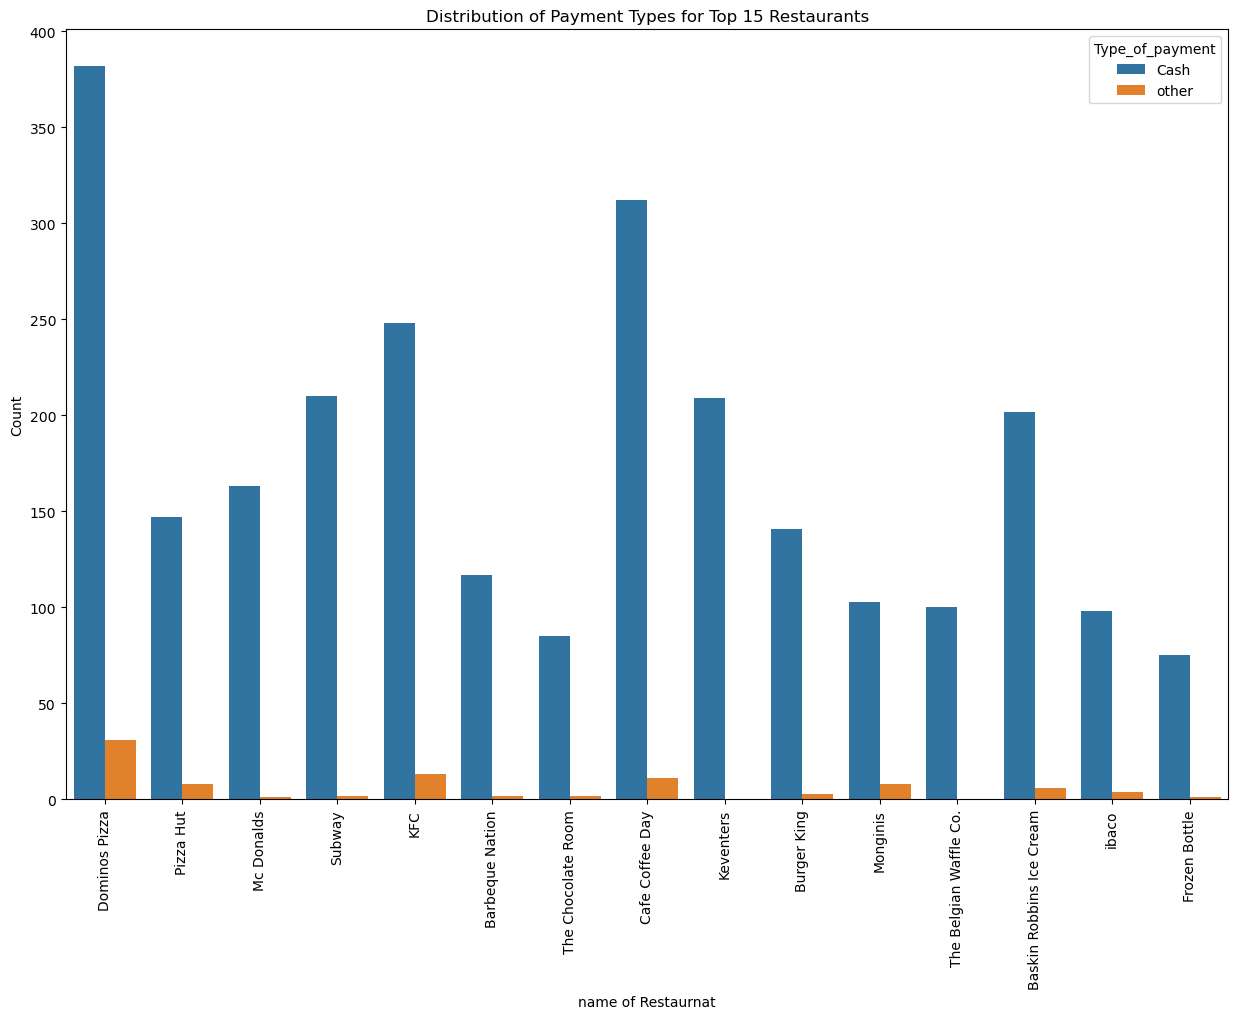

In [36]:
# Select top 10 restaurants
#This part calculates the top 10 restaurants based on the count of occurrences in the 'name' column. 
#It returns a pandas Index object containing the names of the top 10 restaurants.

#So, the isin method is helping you filter your DataFrame to include only the data related to the top
#10 restaurants, making it easier to create a more focused visualization for those specific 
#restaurants.

# Filter the data for the top 10 restaurants
#This part checks for each row in the 'name' column of the original DataFrame (Rest_data) 
#whether the restaurant name is present in the list of top restaurants (top_restaurants).
#It returns a boolean Series indicating whether each row is in the top 10 or not.
top_restaurants = Rest_data['name'].value_counts().head(15).index
subset_data = Rest_data[Rest_data['name'].isin(top_restaurants)]
plt.figure(figsize = (15,10))
sns.countplot(x = 'name', hue= 'Type_of_payment', data = subset_data)
plt.xticks(rotation = 90)
plt.xlabel('name of Restaurnat')
plt.ylabel('Count')
plt.title('Distribution of Payment Types for Top 15 Restaurants')

Text(0.5, 1.0, 'Distribution of Restaurant on veg or non veg for Top 15 Restaurants')

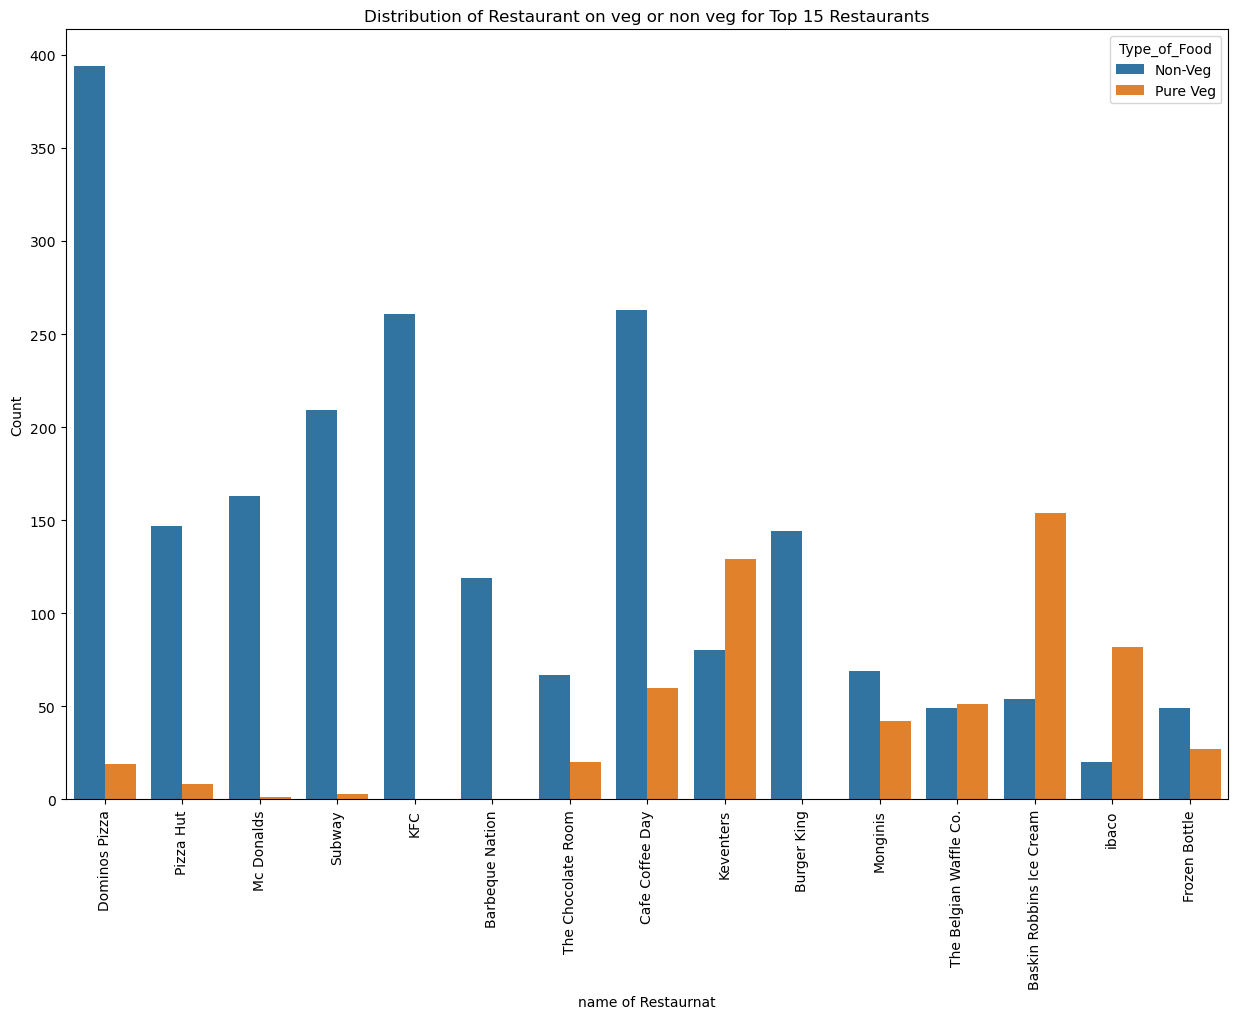

In [37]:
top_restaurants = Rest_data['name'].value_counts().head(15).index
subset_data = Rest_data[Rest_data['name'].isin(top_restaurants)]
plt.figure(figsize = (15,10))
sns.countplot(x = 'name', hue= 'Type_of_Food', data = subset_data)
plt.xticks(rotation = 90)
plt.xlabel('name of Restaurnat')
plt.ylabel('Count')
plt.title('Distribution of Restaurant on veg or non veg for Top 15 Restaurants')

C:\Users\rajat\AppData\Local\Temp\ipykernel_4920\4147235822.py:5: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = 'locality', hue= 'delivery', data = subset_data, palette=colors)


Text(0.5, 1.0, 'Distribution of Restaurant on delivery Top 15 Restaurants')

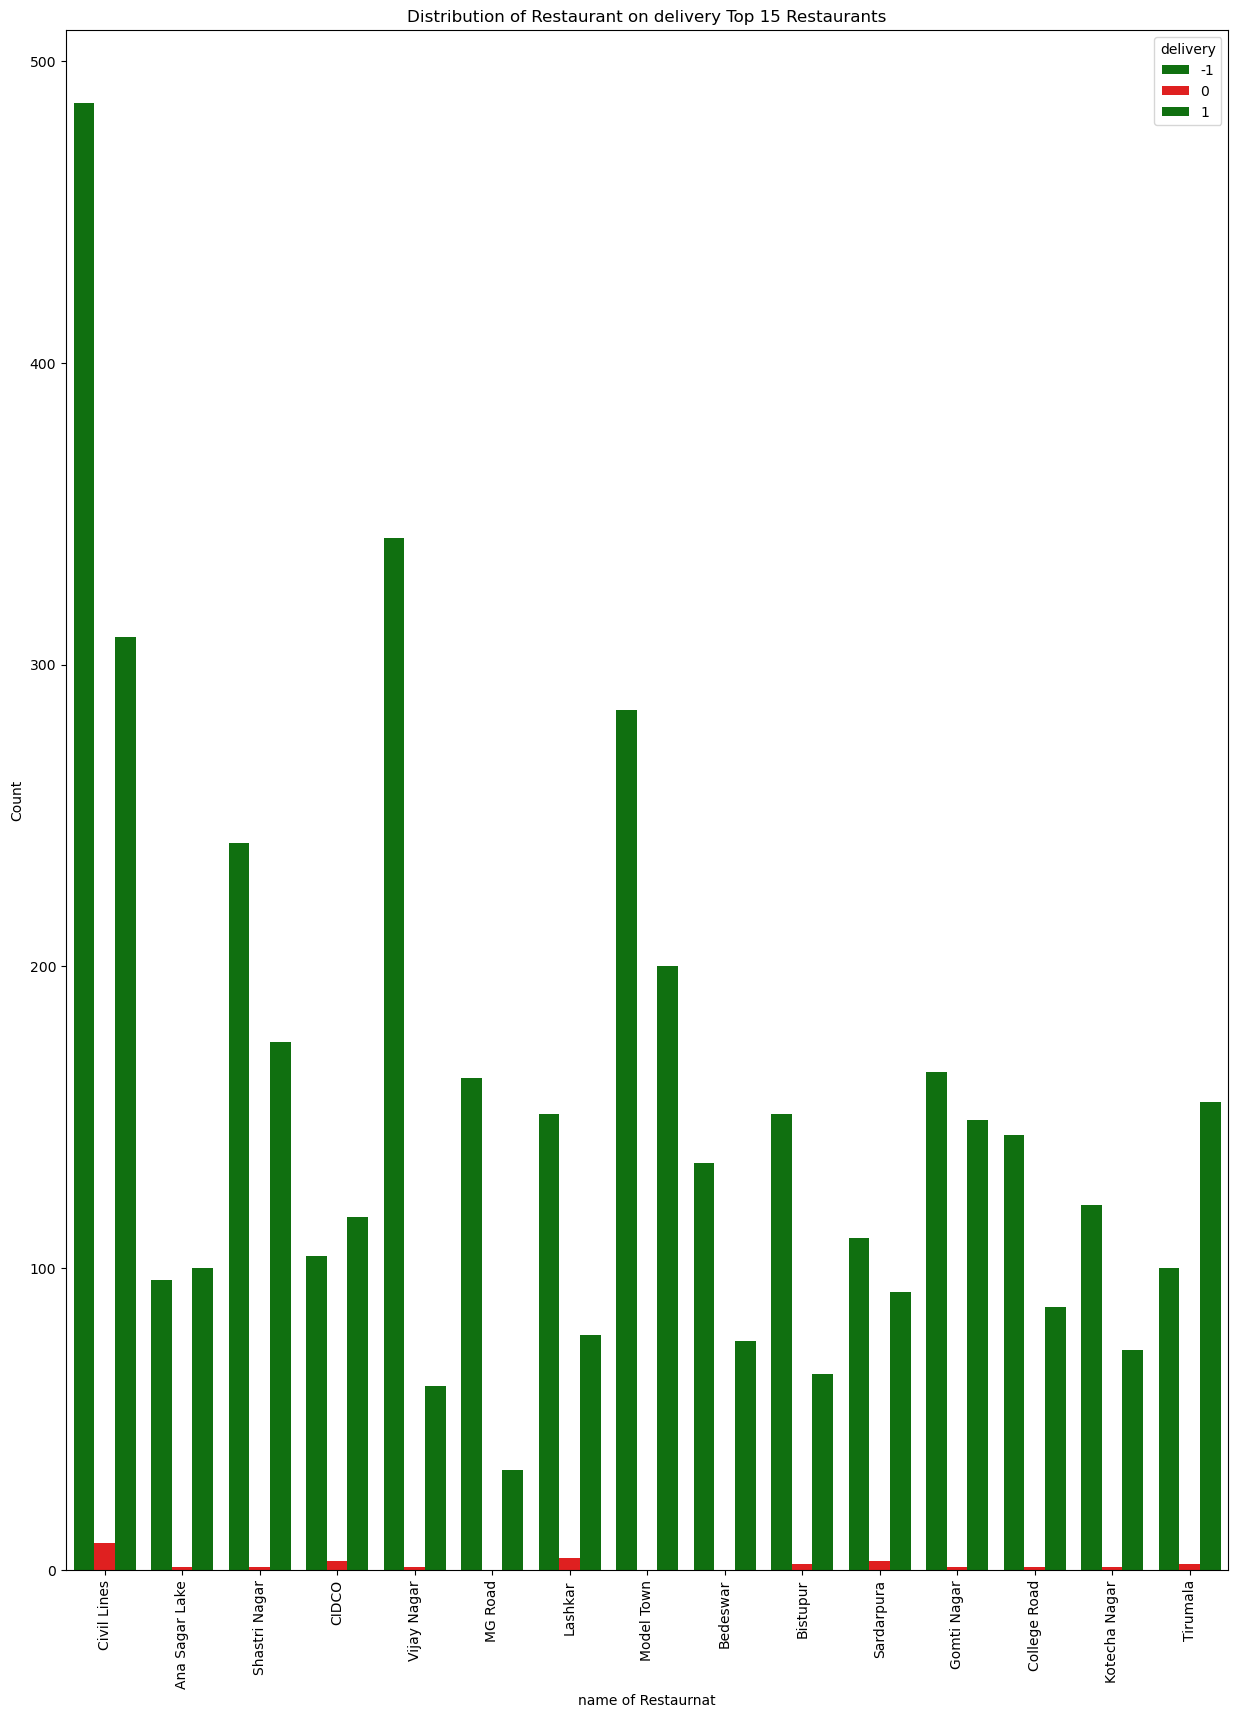

In [38]:
top_restaurants = Rest_data['locality'].value_counts().head(15).index
subset_data = Rest_data[Rest_data['locality'].isin(top_restaurants)]
plt.figure(figsize = (15,20))
hue_order = ['cancelled delivery', 'Successful delivery', 'Neutral']
sns.countplot(x = 'locality', hue= 'delivery', data = subset_data, palette=colors)
plt.xticks(rotation = 90)
plt.xlabel('name of Restaurnat')
plt.ylabel('Count')
plt.title('Distribution of Restaurant on delivery Top 15 Restaurants')

C:\Users\rajat\AppData\Local\Temp\ipykernel_4920\2011161632.py:4: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.histplot(x = 'locality_verbose', hue= 'takeaway', data = subset_data, palette=colors)


Text(0.5, 1.0, 'Distribution of Restaurant on veg or non veg for Top 15 Restaurants')

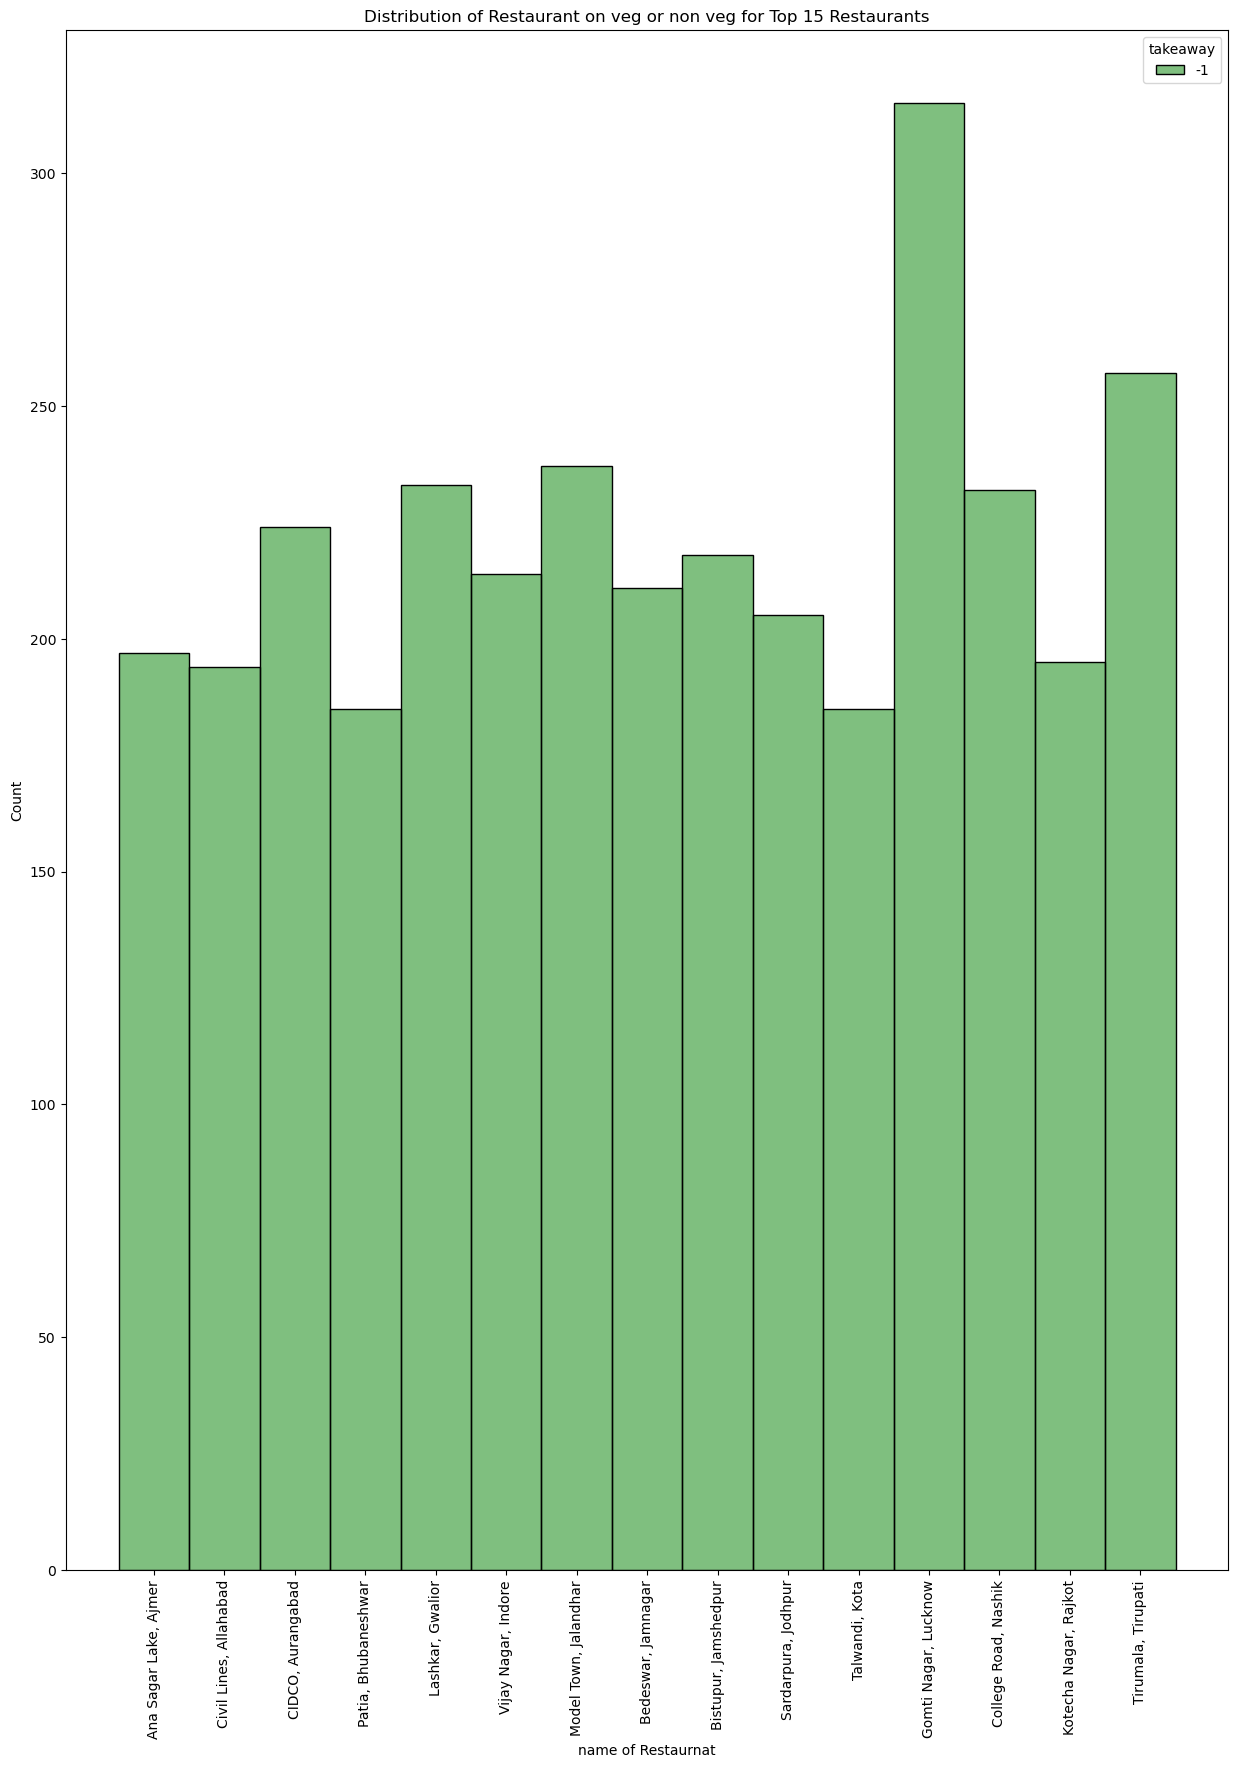

In [39]:
top_restaurants = Rest_data['locality_verbose'].value_counts().head(15).index
subset_data = Rest_data[Rest_data['locality_verbose'].isin(top_restaurants)]
plt.figure(figsize = (15,20))
sns.histplot(x = 'locality_verbose', hue= 'takeaway', data = subset_data, palette=colors)
plt.xticks(rotation = 90)
plt.xlabel('name of Restaurnat')
plt.ylabel('Count')
plt.title('Distribution of Restaurant on veg or non veg for Top 15 Restaurants')

In [40]:
Rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60411 entries, 0 to 211942
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                60411 non-null  int64  
 1   name                  60411 non-null  object 
 2   establishment         60411 non-null  object 
 3   address               60411 non-null  object 
 4   city                  60411 non-null  object 
 5   city_id               60411 non-null  int64  
 6   locality              60411 non-null  object 
 7   latitude              60411 non-null  float64
 8   longitude             60411 non-null  float64
 9   country_id            60411 non-null  int64  
 10  locality_verbose      60411 non-null  object 
 11  cuisines              60411 non-null  object 
 12  timings               60411 non-null  object 
 13  average_cost_for_two  60411 non-null  int64  
 14  price_range           60411 non-null  int64  
 15  currency              6

# Study correlation

In [41]:
Rest_data[['average_cost_for_two','aggregate_rating','votes','photo_count']].corr()

,average_cost_for_two,aggregate_rating,votes,photo_count
average_cost_for_two,1.000000,0.255423,0.274421,0.326113
aggregate_rating,0.255423,1.000000,0.277542,0.230847
votes,0.274421,0.277542,1.000000,0.677655
photo_count,0.326113,0.230847,0.677655,1.000000


<AxesSubplot: >

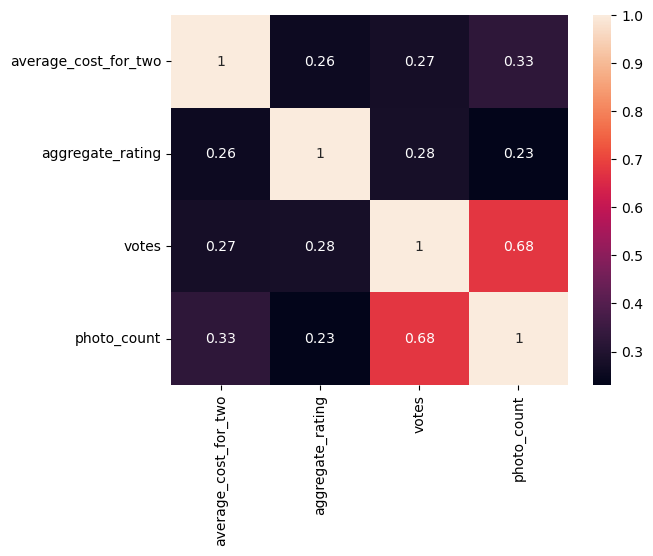

In [42]:
sns.heatmap(Rest_data[['average_cost_for_two','aggregate_rating','votes','photo_count']].corr(),annot = True)

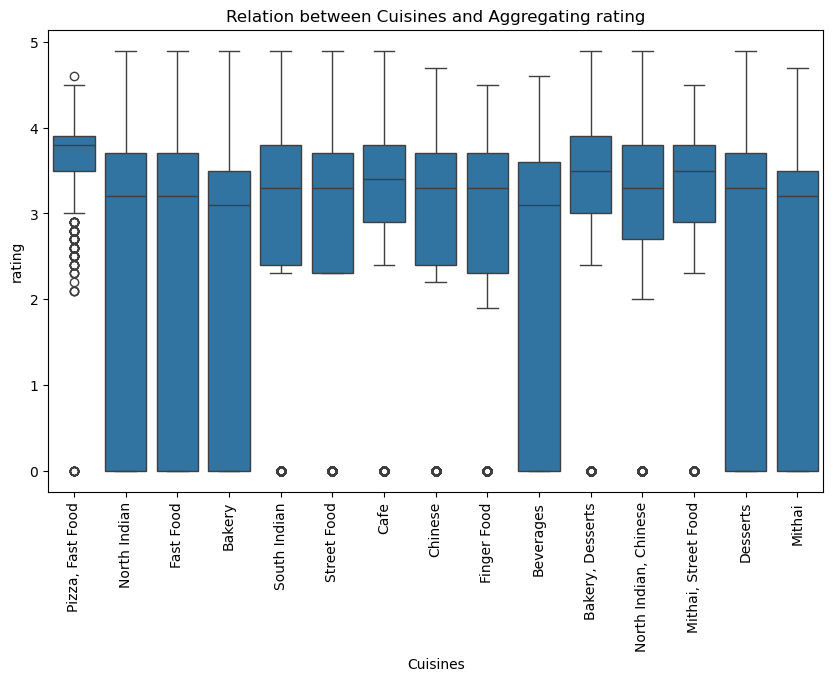

In [43]:
#Analyze the relationship between the type of cuisine and the restaurant's rating
top = 15
topc = Rest_data['cuisines'].value_counts().nlargest(top).index
df_sort = Rest_data[Rest_data['cuisines'].isin(topc)]
plt.figure(figsize = (10,6))

sns.boxplot(data = df_sort, x = 'cuisines', y = 'aggregate_rating')
plt.title("Relation between Cuisines and Aggregating rating")
plt.xticks(rotation=90)
plt.xlabel('Cuisines')
plt.ylabel('rating')
plt.show()

# Handling outlier

In [44]:
Rest_data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,delivery,takeaway
count,6.041100e+04,60411.000000,60411.000000,60411.000000,60411.0,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.0
mean,1.309280e+07,3417.519922,21.349891,76.587651,1.0,538.290940,1.730811,3.032794,261.508219,193.969393,-0.371704,-1.0
std,8.133029e+06,5179.012871,41.189967,10.600965,0.0,593.852855,0.880460,1.440785,728.072564,702.111852,0.925287,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.0
25%,3.000479e+06,7.000000,16.324531,74.653081,1.0,200.000000,1.000000,2.900000,7.000000,1.000000,-1.000000,-1.0
50%,1.869150e+07,26.000000,22.320915,77.134875,1.0,400.000000,1.000000,3.500000,42.000000,11.000000,-1.000000,-1.0
75%,1.886670e+07,11295.000000,26.744391,79.928133,1.0,600.000000,2.000000,4.000000,207.000000,82.000000,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,1.000000,-1.0


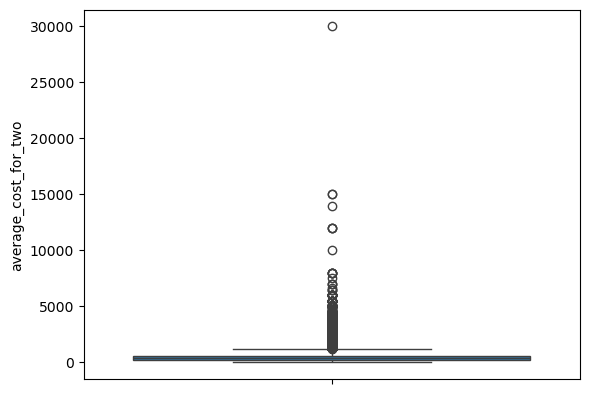

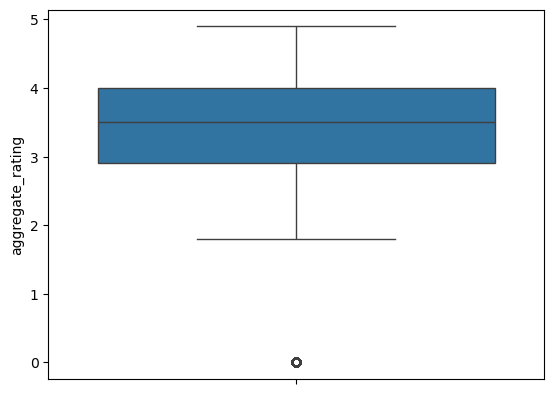

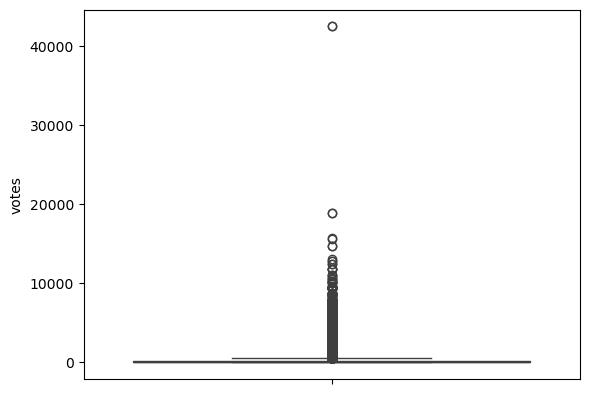

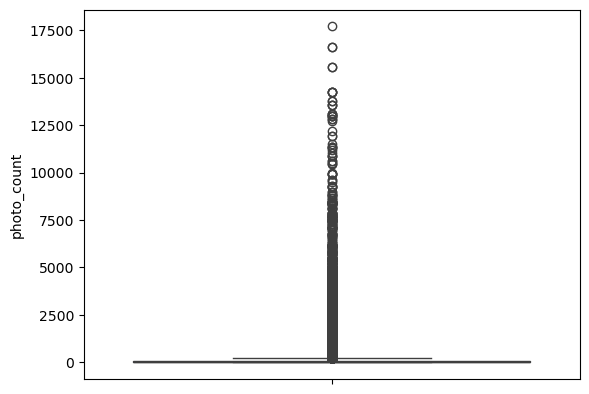

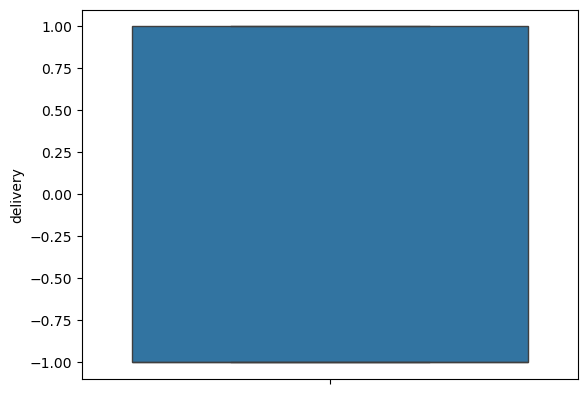

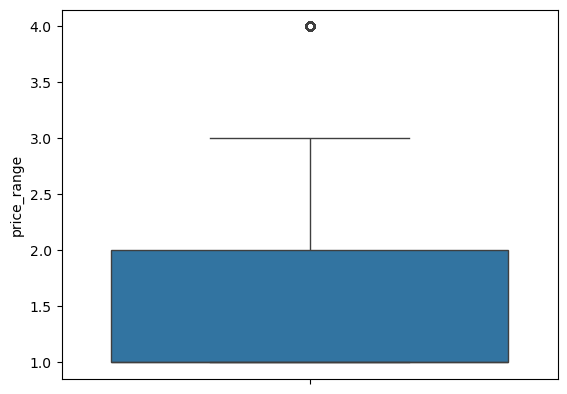

In [45]:
#checking the outlier int datatype
for i in Rest_data[['average_cost_for_two','aggregate_rating','votes','photo_count', 'delivery','price_range']]:
    sns.boxplot(Rest_data[i])
    plt.show()

In [46]:
Rest_data['average_cost_for_two'].describe()

count    60411.000000
mean       538.290940
std        593.852855
min          0.000000
25%        200.000000
50%        400.000000
75%        600.000000
max      30000.000000
Name: average_cost_for_two, dtype: float64

In [47]:
#finding the IOR
q1 = Rest_data['average_cost_for_two'].quantile(0.25)
q3 = Rest_data['average_cost_for_two'].quantile(0.75)

print("My first quantile is", q1)
print("My second quantile is", q3)

My first quantile is 200.0
My second quantile is 600.0


In [48]:
Iqr = q3 - q1
print("My IQR Is", Iqr)

My IQR Is 400.0


In [49]:
upper_limit = q3 + 1.5*Iqr
lower_limit = q1 - 1.5*Iqr

print("The upper limit is", upper_limit)
print("The lower limit is", lower_limit)

The upper limit is 1200.0
The lower limit is -400.0


In [50]:
#finding the outlier
Rest_data[Rest_data['average_cost_for_two'] > upper_limit]

,res_id,name,establishment,address,city,city_id,locality,latitude,longitude,country_id,...,currency,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,takeaway,Type_of_payment,Type_of_Food
16,3400017,Pinch Of Spice,Casual Dining,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Agra,34,Civil Lines,27.201735,78.007625,1,...,Rs.,"Lunch, Delivery, Credit Card, Dinner, Cash, Ta...",4.6,Excellent,915,105,1,-1,Cash,Non-Veg
22,3400018,Pinch Of Spice,Casual Dining,"1076/2, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.159649,78.043304,1,...,Rs.,"Delivery, Dinner, Cash, Credit Card, Debit Car...",4.6,Excellent,965,690,1,-1,Cash,Non-Veg
27,3400850,Urban Deck,Casual Dining,"5th Floor, The P L Palace Hotel, MG Road, Sanj...",Agra,34,Civil Lines,27.199573,78.003699,1,...,Rs.,"Dinner, Cash, Debit Card, Takeaway Available, ...",4.3,Very Good,672,192,1,-1,Cash,Non-Veg
34,3401344,Cafe Turquoise Cottage,Casual Dining,"76, 2nd floor, Fatehabad Road, Near Amar Hotel...",Agra,34,Tajganj,27.161003,78.031400,1,...,Rs.,"Lunch, Serves Alcohol, Takeaway Available, Din...",4.6,Excellent,344,267,-1,-1,Cash,Non-Veg
42,3400853,Mocha,Café,"1448 - 1453 tajganj, Fatehabad Road, Tajganj Agra",Agra,34,Tajganj,27.157950,78.051030,1,...,Rs.,"Dinner, Cash, Takeaway Available, Debit Card, ...",4.4,Very Good,463,482,-1,-1,Cash,Non-Veg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209373,3201575,The Cravings Restaurant,Casual Dining,"Near Bhimnath Bridge, Opposite Parsi Agryari, ...",Vadodara,32,Sayajigunj,22.306557,73.183802,1,...,Rs.,"Dinner, Takeaway Available, Breakfast, Debit C...",3.7,Good,96,256,-1,-1,Cash,Non-Veg
209374,18504024,Mandvi - The Baroda Residency,Fine Dining,"16, The Baroda Residency, Alkapuri Society, Al...",Vadodara,32,Alkapuri,22.312182,73.172715,1,...,Rs.,"Dinner, Cash, Takeaway Available, Breakfast, L...",3.6,Good,70,47,-1,-1,Cash,Non-Veg
209375,18725722,Horizon Rooftop Restaurant,Casual Dining,"Near Bhimnath Bridge, Opposite Parsi Agryari, ...",Vadodara,32,Sayajigunj,22.306514,73.184324,1,...,Rs.,"Dinner, Cash, Takeaway Available, Debit Card, ...",2.6,Average,41,27,-1,-1,Cash,Non-Veg
209377,3200030,Mainland China,Casual Dining,"Bell-E-Vista Complex, Opposite GST Bhavan, Abo...",Vadodara,32,"Centre Square Mall, Alkapuri",22.308815,73.165497,1,...,Rs.,"Dinner, Cash, Debit Card, Lunch, Mall Parking,...",4.1,Very Good,349,127,-1,-1,Cash,Non-Veg


In [51]:
Rest_data[Rest_data['average_cost_for_two'] < lower_limit]

,res_id,name,establishment,address,city,city_id,locality,latitude,longitude,country_id,...,currency,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,takeaway,Type_of_payment,Type_of_Food


In [52]:
new_Rest = Rest_data.copy()
new_Rest['average_cost_for_two'] = np.where(
    new_Rest['average_cost_for_two'] > upper_limit,
    upper_limit,
    np.where(
        new_Rest['average_cost_for_two'] < lower_limit,
        lower_limit,
        new_Rest['average_cost_for_two']
    
    )

)


In [53]:
new_Rest.shape

(60411, 25)

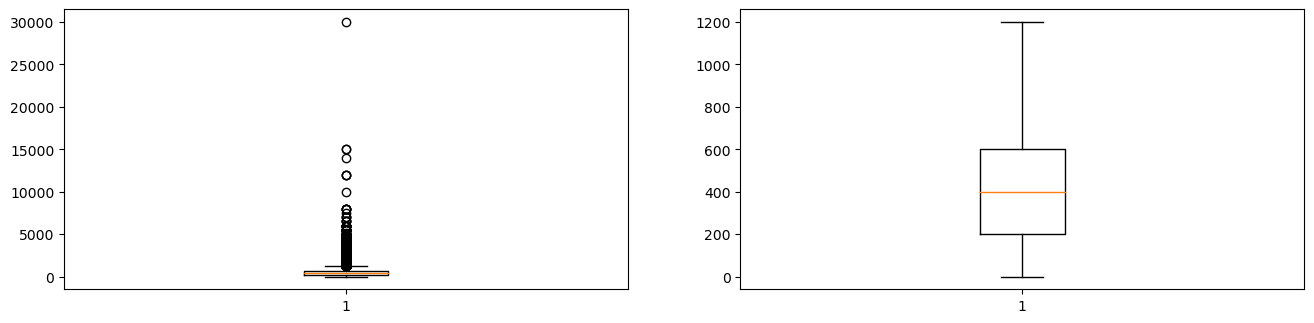

In [54]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
plt.boxplot(Rest_data['average_cost_for_two'])
plt.subplot(2,2,2)
plt.boxplot(new_Rest['average_cost_for_two'])

plt.show()

In [55]:
len(new_Rest.loc[new_Rest['average_cost_for_two']>upper_limit])/len(new_Rest)*100

0.0

In [56]:
len(Rest_data.loc[Rest_data['average_cost_for_two']>upper_limit])/len(Rest_data)*100

8.755028057804044

In [57]:
len(Rest_data.loc[Rest_data['photo_count']>upper_limit])/len(Rest_data)*100

3.9463011703166644

In [58]:
Rest_data['photo_count'].describe()

count    60411.000000
mean       193.969393
std        702.111852
min          0.000000
25%          1.000000
50%         11.000000
75%         82.000000
max      17702.000000
Name: photo_count, dtype: float64

In [59]:
#finding the IOR
q1 = Rest_data['photo_count'].quantile(0.25)
q3 = Rest_data['photo_count'].quantile(0.75)

print("My first quantile is", q1)
print("My second quantile is", q3)

My first quantile is 1.0
My second quantile is 82.0


In [60]:
Iqr = q3 - q1
print("My IQR Is", Iqr)

My IQR Is 81.0


In [61]:
upper_limit = q3 + 1.5*Iqr
lower_limit = q1 - 1.5*Iqr

print("The upper limit is", upper_limit)
print("The lower limit is", lower_limit)

The upper limit is 203.5
The lower limit is -120.5


In [62]:
#finding the outlier
Rest_data[Rest_data['photo_count'] > upper_limit]

,res_id,name,establishment,address,city,city_id,locality,latitude,longitude,country_id,...,currency,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,takeaway,Type_of_payment,Type_of_Food
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,1,...,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,1,-1,Cash,Non-Veg
9,3400838,Sugar N Thyme,Café,"1374 K/1375 K, Ground floor, Dinesh Nagar, Fat...",Agra,34,Tajganj,27.158243,78.045591,1,...,Rs.,"No Alcohol Available, Dinner, Delivery, Credit...",4.4,Very Good,289,324,1,-1,Cash,Non-Veg
10,3400868,Hichkee,Casual Dining,"6/27/1A, Hotel Alleviate, Yamuna Kinara Road, ...",Agra,34,Civil Lines,27.190041,78.024693,1,...,Rs.,"Dinner, Delivery, Credit Card, Lunch, Serves A...",4.4,Very Good,683,229,1,-1,Cash,Non-Veg
22,3400018,Pinch Of Spice,Casual Dining,"1076/2, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.159649,78.043304,1,...,Rs.,"Delivery, Dinner, Cash, Credit Card, Debit Car...",4.6,Excellent,965,690,1,-1,Cash,Non-Veg
29,18888066,Kiskey Whiskey,Bar,"Floor 2, 119/8, Ashok Cosmos Mall, Sanjay Plac...",Agra,34,Civil Lines,27.201117,78.008512,1,...,Rs.,"Takeaway Available, Lunch, Dinner, Cash, Fullb...",4.5,Excellent,406,235,-1,-1,Cash,Non-Veg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210288,3201089,Papa Cakes,Bakery,"Shop 2, Shree Siddheshwar Hub, Nr Vainkunth 2 ...",Vadodara,32,Sayajipura,22.323417,73.231223,1,...,Rs.,"Standing Tables, Delivery, Cash, Outdoor Seati...",3.3,Average,16,557,-1,-1,Cash,Pure Veg
210608,18409523,Jassi De Parathe,Quick Bites,"Near Kalaniketan, R.C Dutt Road, Alkapuri, Vad...",Vadodara,32,Alkapuri,22.310642,73.166323,1,...,Rs.,"Dinner, Cash, Takeaway Available, Credit Card,...",4.8,Excellent,1799,356,-1,-1,Cash,Pure Veg
211130,3201427,Tea Villa Café,Café,"7, Atlantis Heights, Opposite Swagat Petrol Pu...",Vadodara,32,Vadiwadi,22.316697,73.167600,1,...,Rs.,"Dinner, Cash, Delivery, Credit Card, Debit Car...",4.3,Very Good,666,531,-1,-1,Cash,Non-Veg
211443,3200024,Pizza Hut,Quick Bites,"51,Akashganga Complex,Race Course Road, Vadiwa...",Vadodara,32,Vadiwadi,22.311819,73.164801,1,...,Rs.,"Dinner, Delivery, Credit Card, Lunch, Cash, Ta...",3.8,Good,775,205,-1,-1,Cash,Non-Veg


In [63]:
#finding the outlier
Rest_data[Rest_data['photo_count'] < lower_limit]

,res_id,name,establishment,address,city,city_id,locality,latitude,longitude,country_id,...,currency,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,takeaway,Type_of_payment,Type_of_Food


In [64]:
new_Rest = Rest_data.copy()
new_Rest['photo_count'] = np.where(
    new_Rest['photo_count'] > upper_limit,
    upper_limit,
    np.where(
        new_Rest['photo_count'] < lower_limit,
        lower_limit,
        new_Rest['photo_count']
    
    )

)

In [65]:
new_Rest.shape

(60411, 25)

{'whiskers': [<matplotlib.lines.Line2D at 0x2dbae2ae670>,
 'caps': [<matplotlib.lines.Line2D at 0x2dbae2aebb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2dbae2ae3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2dbae2bd130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2dbae2bd3d0>],
 'means': []}

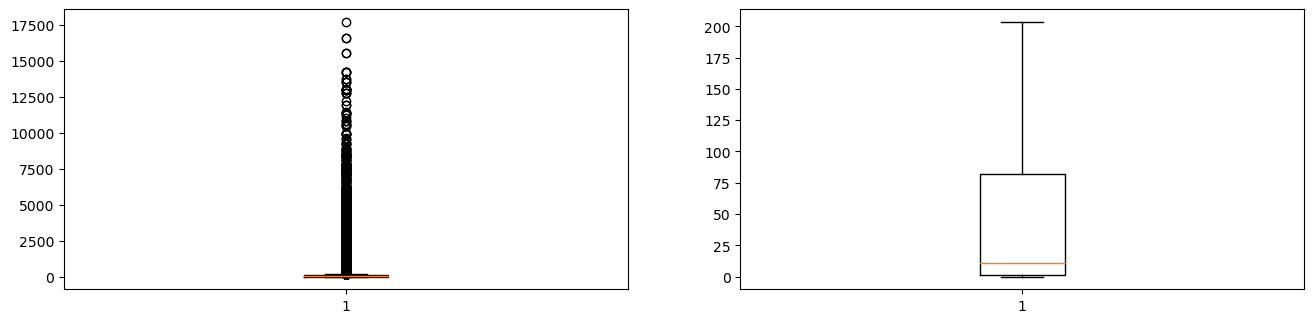

In [66]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
plt.boxplot(Rest_data['photo_count'])
plt.subplot(2,2,2)
plt.boxplot(new_Rest['photo_count'])

In [67]:
len(Rest_data.loc[Rest_data['aggregate_rating']>upper_limit])/len(Rest_data)*100

0.0

# Model train

In [68]:
new_Rest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60411 entries, 0 to 211942
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                60411 non-null  int64  
 1   name                  60411 non-null  object 
 2   establishment         60411 non-null  object 
 3   address               60411 non-null  object 
 4   city                  60411 non-null  object 
 5   city_id               60411 non-null  int64  
 6   locality              60411 non-null  object 
 7   latitude              60411 non-null  float64
 8   longitude             60411 non-null  float64
 9   country_id            60411 non-null  int64  
 10  locality_verbose      60411 non-null  object 
 11  cuisines              60411 non-null  object 
 12  timings               60411 non-null  object 
 13  average_cost_for_two  60411 non-null  int64  
 14  price_range           60411 non-null  int64  
 15  currency              6

In [69]:
# Convert categorical columns to numerical values
new_Rest['Type_of_payment'] = pd.factorize(new_Rest['Type_of_payment'])[0]
new_Rest['Type_of_Food'] = pd.factorize(new_Rest['Type_of_Food'])[0]

In [70]:
new_Rest['rating_text'] = pd.factorize(new_Rest['rating_text'])[0]
new_Rest['currency'] = pd.factorize(new_Rest['currency'])[0]

In [71]:
new_Rest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60411 entries, 0 to 211942
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                60411 non-null  int64  
 1   name                  60411 non-null  object 
 2   establishment         60411 non-null  object 
 3   address               60411 non-null  object 
 4   city                  60411 non-null  object 
 5   city_id               60411 non-null  int64  
 6   locality              60411 non-null  object 
 7   latitude              60411 non-null  float64
 8   longitude             60411 non-null  float64
 9   country_id            60411 non-null  int64  
 10  locality_verbose      60411 non-null  object 
 11  cuisines              60411 non-null  object 
 12  timings               60411 non-null  object 
 13  average_cost_for_two  60411 non-null  int64  
 14  price_range           60411 non-null  int64  
 15  currency              6

In [72]:
drop_col= ['establishment','address','cuisines','name','city','locality_verbose','timings','highlights','locality']

new_Rest.drop(columns= drop_col, inplace=True)

In [73]:
new_Rest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60411 entries, 0 to 211942
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                60411 non-null  int64  
 1   city_id               60411 non-null  int64  
 2   latitude              60411 non-null  float64
 3   longitude             60411 non-null  float64
 4   country_id            60411 non-null  int64  
 5   average_cost_for_two  60411 non-null  int64  
 6   price_range           60411 non-null  int64  
 7   currency              60411 non-null  int64  
 8   aggregate_rating      60411 non-null  float64
 9   rating_text           60411 non-null  int64  
 10  votes                 60411 non-null  int64  
 11  photo_count           60411 non-null  float64
 12  delivery              60411 non-null  int64  
 13  takeaway              60411 non-null  int64  
 14  Type_of_payment       60411 non-null  int64  
 15  Type_of_Food          6

# Training and Testing Sets for machine learning

In [74]:
X = new_Rest.drop('aggregate_rating', axis = 1) #independence
y = new_Rest['aggregate_rating']#dependence

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [75]:
print("Length of Training Set :", len(X_train))
print("Length of Testing Set :", len(X_test))

Length of Training Set : 42287
Length of Testing Set : 18124


In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import xgboost as xgb

In [77]:
treemodel = DecisionTreeRegressor()
#Train Model
treemodel.fit(X_train, y_train)

DecisionTreeRegressor()

In [78]:
Randmodel = RandomForestRegressor(n_estimators=100, random_state=42)
#Train Model
Randmodel.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
reg = LinearRegression()
#Train Model
reg.fit(X_train, y_train)

LinearRegression()

In [80]:
print("Coefficient or slope", reg.coef_)
print("Intercept:", reg.intercept_)

Coefficient or slope [-1.58390287e-08 -7.92261115e-06  2.13030585e-03  8.53293020e-03
 -2.42861287e-16  1.66226383e-05  1.32096025e-01 -5.55111512e-17
 -2.15586564e-01  6.80030905e-05  4.87625352e-03  2.15551699e-01
  0.00000000e+00 -3.77862105e-01 -1.93161821e-01]
Intercept: 2.79133217570705


In [81]:
print("The score of DecisionTreeRegressor", treemodel.score(X_test, y_test))
print("The score of Random forest", Randmodel.score(X_test, y_test))
print("The score of linearRegression", reg.score(X_test, y_test))

The score of DecisionTreeRegressor 0.9807806770379501
The score of Random forest 0.9898158493013733
The score of linearRegression 0.3761656920093428


In [82]:
from sklearn.metrics import mean_squared_error

#predicted on the test data
y_pred = Randmodel.predict(X_test)

#Evaluate the model
training_score = Randmodel.score(X_train, y_train)
Testing_score = Randmodel.score(X_test, y_test)




print('Training Score :', training_score, '%')
print('Testing Score :', Testing_score, '%')
print('Mean Squared Error (MSE) :', mse)
print('Root Mean Squared Error (RMSE) :', rmse)

Training Score : 0.998551915917698 %
Testing Score : 0.9898158493013733 %
Mean Squared Error (MSE) : 0.021211144835577133
Root Mean Squared Error (RMSE) : 0.14564046427959892


In [83]:
Randmodel.predict(X_test)

array([0.   , 4.05 , 4.66 , ..., 3.528, 3.721, 3.757])

In [84]:
np.array(y_test)

array([0. , 4.2, 4.7, ..., 3.5, 3.8, 3.6])

In [85]:
# Instantiate XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 100)

In [87]:
# Fit the model
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [88]:
# Predict on the test set
preds = xg_reg.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.189041
